In [40]:

import random
import pandas as pd
from matplotlib import pyplot as plt
import scipy

ModuleNotFoundError: No module named 'scipy'

In [41]:
!pip install scipy

In [4]:
rand_numbers = [random.randrange(1, 100, 1) for i in range(100)]

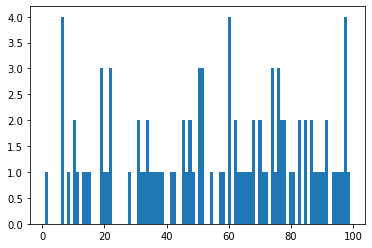

In [7]:
plt.hist(rand_numbers, bins=100)
plt.show()

In [8]:
df = pd.DataFrame(rand_numbers)
df

,0
0,60
1,78
2,97
3,75
4,85
...,...
95,94
96,85
97,13
98,87


In [10]:
population_variance = int(df.var(ddof=0))
# Don't round in general, but we will to make example easier
print(population_variance)

784


In [15]:
# With reset index, it creates uniform index off of the rows position in the dataframe
df_sample_size_10 = df.sample(10).reset_index(drop=True) # drop = True -> drops pushed index
# Returns new random dataframe out of our original dataframe
df_sample_size_10

,0
0,78
1,50
2,50
3,74
4,64
5,63
6,87
7,39
8,19
9,13


In [16]:
variance_of_samples = []      
# = sum(variance_of_samples/len(variance_of_samples))
mean_rolling_variance = []

# Loop runs 100 times - avoid dividing by 0
for i in range(1, 101):
    # Set variable equal to sample of dataframe
    sample_of_10 = df.sample(10).reset_index(drop=True)
    # Get the (Not using Bessel's Correction in this) biased sample variance with 0 degrees of freedom
    sample_of_10_variance = int(sample_of_10.var(ddof=0))
    
    # Append the variance of current sample
    variance_of_samples.append(sample_of_10_variance)
    
    # When i == 1, skip the calculation
    if(i == 1):
        mean_rolling_variance.append(sample_of_10_variance)
    else:
        mean_rolling_variance.append(sum(variance_of_samples)/i)

In [18]:
df_100_samples = pd.DataFrame(list(zip(variance_of_samples, mean_rolling_variance)),
                              columns=['Sample Variance', 'Rolling Variance'])
df_100_samples

,Sample Variance,Rolling Variance
0,875,875.000000
1,1102,988.500000
2,528,835.000000
3,724,807.250000
4,825,810.800000
...,...,...
95,944,731.885417
96,916,733.783505
97,408,730.459184
98,195,725.050505


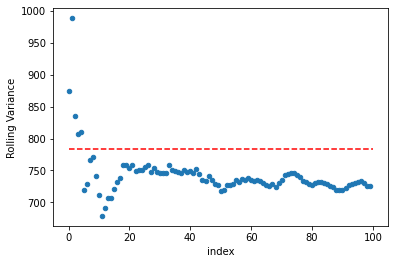

In [26]:
# Empty canvas
fig, ax = plt.subplots()
df_100_samples.reset_index().plot.scatter(x='index', y='Rolling Variance', ax=ax)
ax.plot([0, 100], [population_variance, population_variance], linestyle='--', color='red')
plt.show()

In [27]:
df = pd.read_csv('Data_to_work_through.csv')
df


,Name,ASSIGNMENT NAME,GRADES,Time Studied
0,Bob,GEOGRAPHY_TEST_1,90,1:30HRS
1,OSCAR,GEOGRAPHY_TEST_1,80,1:15HRS
2,TED,GEOGRAPHY_TEST_1,70,45mins
3,WINONA,GEOGRAPHY_TEST_1,85,1:30HRS
4,FRED,GEOGRAPHY_TEST_1,100,45mins
5,CHILE,GEOGRAPHY_TEST_1,87,1:30HRS
6,NORMA,GEOGRAPHY_TEST_1,92,1:30HRS
7,AARON,GEOGRAPHY_TEST_1,87,1:15HRS
8,SHERYL,geography test 1,85,1:15HRS
9,LUIS,geograPHY_TEST_1,90,1:30HRS


In [38]:
df_geo = df[:14]
df_geo['ASSIGNMENT NAME'] = 'GEOGRAPHY_TEST_1'
df_geo

C:\Users\dylan\AppData\Local\Temp/ipykernel_21200/3510472170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['ASSIGNMENT NAME'] = 'GEOGRAPHY_TEST_1'


,Name,ASSIGNMENT NAME,GRADES,Time Studied
0,Bob,GEOGRAPHY_TEST_1,90,1:30HRS
1,OSCAR,GEOGRAPHY_TEST_1,80,1:15HRS
2,TED,GEOGRAPHY_TEST_1,70,45mins
3,WINONA,GEOGRAPHY_TEST_1,85,1:30HRS
4,FRED,GEOGRAPHY_TEST_1,100,45mins
5,CHILE,GEOGRAPHY_TEST_1,87,1:30HRS
6,NORMA,GEOGRAPHY_TEST_1,92,1:30HRS
7,AARON,GEOGRAPHY_TEST_1,87,1:15HRS
8,SHERYL,GEOGRAPHY_TEST_1,85,1:15HRS
9,LUIS,GEOGRAPHY_TEST_1,90,1:30HRS


In [32]:
df_math = df[df['ASSIGNMENT NAME'] == 'Math_test_1'].reset_index(drop=True)
df_math


,Name,ASSIGNMENT NAME,GRADES,Time Studied
0,Bob,Math_test_1,85,2:00RS
1,OSCAR,Math_test_1,80,2:00RS
2,TED,Math_test_1,70,01:30:00 AM
3,WINONA,Math_test_1,80,2:00RS
4,FRED,Math_test_1,95,2:00RS
5,CHILE,Math_test_1,82,01:30:00 AM
6,NORMA,Math_test_1,85,2:00RS
7,AARON,Math_test_1,75,1:15HRS
8,SHERYL,Math_test_1,78,1:15HRS
9,LUIS,Math_test_1,90,01:30:00 AM


In [39]:
df_writing = df[df['ASSIGNMENT NAME'] == 'writing_take_hoome_test'].reset_index(drop=True)
df_writing['ASSIGNMENT NAME'] = 'writing_take_home_test'
df_writing

,Name,ASSIGNMENT NAME,GRADES,Time Studied
0,Bob,writing_take_home_test,95,2:00RS
1,OSCAR,writing_take_home_test,80,1:15HRS
2,TED,writing_take_home_test,40,30 MINS
3,WINONA,writing_take_home_test,80,1:15HRS
4,FRED,writing_take_home_test,99,2:00RS
5,CHILE,writing_take_home_test,82,1:15HRS
6,NORMA,writing_take_home_test,100,2:00RS
7,AARON,writing_take_home_test,95,2:00RS
8,SHERYL,writing_take_home_test,91,2:00RS
9,LUIS,writing_take_home_test,80,1:15HRS


In [34]:
df_programming = df[df['ASSIGNMENT NAME'] == 'programming_test_1'].reset_index(drop=True)
df_programming

,Name,ASSIGNMENT NAME,GRADES,Time Studied
0,Bob,programming_test_1,91,1:00RS
1,OSCAR,programming_test_1,96,3:00HRS
2,TED,programming_test_1,92,3:00HRS
3,WINONA,programming_test_1,90,1:00RS
4,FRED,programming_test_1,99,1:00RS
5,CHILE,programming_test_1,100,1:00RS
6,NORMA,programming_test_1,100,2:00RS
7,AARON,programming_test_1,98,2:00RS
8,SHERYL,programming_test_1,100,2:00RS
9,LUIS,programming_test_1,92,2:00RS


<AxesSubplot:ylabel='Density'>

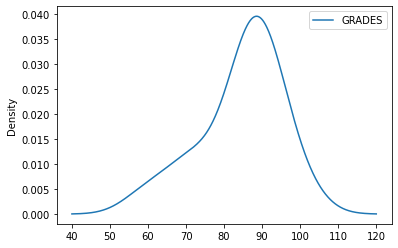

In [42]:
df_geo.plot.kde()

In [44]:
geo_pop_var = df_geo.var(ddof=0)
geo_pop_var

C:\Users\dylan\AppData\Local\Temp/ipykernel_21200/3277012242.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  geo_pop_var = df_geo.var(ddof=0)


GRADES    105.530612
dtype: float64

In [46]:
geo_sample = df_geo.sample(7).reset_index(drop=True)
geo_sample_var = geo_sample.var()
geo_sample_var

C:\Users\dylan\AppData\Local\Temp/ipykernel_21200/2528706046.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  geo_sample_var = geo_sample.var()


GRADES    135.952381
dtype: float64

In [47]:
geo_sample

,Name,ASSIGNMENT NAME,GRADES,Time Studied
0,LUIS,GEOGRAPHY_TEST_1,90,1:30HRS
1,NORMA,GEOGRAPHY_TEST_1,92,1:30HRS
2,OSCAR,GEOGRAPHY_TEST_1,80,1:15HRS
3,WINONA,GEOGRAPHY_TEST_1,85,1:30HRS
4,TED,GEOGRAPHY_TEST_1,70,45mins
5,JAKE,GEOGRAPHY_TEST_1,60,30 MINS
6,ED,GEOGRAPHY_TEST_1,72,1:15HRS


In [ ]:


for i in range(100):
    geo_samp_100 = df_geo.sample(7)reset_index(drop=True)
    geo_samp_100_var = int(sampl)

In [ ]:
variance_of_samples = []      
# = sum(variance_of_samples/len(variance_of_samples))
mean_rolling_variance = []

# Loop runs 100 times - avoid dividing by 0
for i in range(1, 101):
    # Set variable equal to sample of dataframe
    sample_of_10 = df.sample(10).reset_index(drop=True)
    # Get the (Not using Bessel's Correction in this) biased sample variance with 0 degrees of freedom
    sample_of_10_variance = int(sample_of_10.var(ddof=0))
    
    # Append the variance of current sample
    variance_of_samples.append(sample_of_10_variance)
    
    # When i == 1, skip the calculation
    if(i == 1):
        mean_rolling_variance.append(sample_of_10_variance)
    else:
        mean_rolling_variance.append(sum(variance_of_samples)/i)